# ingest data

In [ ]:
# create_usstock_bundle("usstock-1day", data_frequency="daily")

In [1]:
import quantrocket.master
from quantrocket.master import get_securities
import pandas as pd

In [3]:
from quantrocket.zipline import create_usstock_bundle
from quantrocket.zipline import ingest_bundle
from quantrocket.history import create_ibkr_db
from quantrocket.history import collect_history
from quantrocket.zipline import create_bundle_from_db, drop_bundle
from quantrocket.ibg import start_gateways
from quantrocket.history import collect_history
from quantrocket import get_prices

In [2]:
exchanges_ind_result = quantrocket.master.list_ibkr_exchanges(regions=None, sec_types='IND')

In [10]:
exchanges_ind_result

{'IND': {'United States': ['CFE',
   'CBOE',
   'CME',
   'CBOT',
   'COMEX',
   'NYMEX',
   'ISEOPT',
   'NASDAQ',
   'NSX',
   'NYSE',
   'AMEX',
   'PSE',
   'NYSELIFFE',
   'PHLX'],
  'Canada': ['CDE', 'TSE'],
  'Austria': ['VSE'],
  'Belgium': ['BELFOX'],
  'France': ['MATIF', 'MONEP'],
  'Germany': ['EUREX', 'IBIS'],
  'Italy': ['BVME'],
  'Netherlands': ['FTA', 'ENDEX'],
  'Spain': ['BM', 'MEFFRV'],
  'Sweden': ['OMS', 'SFB'],
  'Switzerland': ['SOFFEX', 'EBS', 'VIRTX'],
  'United Kingdom': ['ICEEU', 'ICEEUSOFT', 'LSE'],
  'Australia': ['SNFE', 'ASX'],
  'Hong Kong': ['HKFE'],
  'India': ['NSE'],
  'Japan': ['OSE.JPN', 'TSE.JPN'],
  'Singapore': ['SGX'],
  'South Korea': ['KSE']}}

In [11]:
exchanges_ind = []
for c, exs in exchanges_ind_result['IND'].items():
    exchanges_ind += exs

In [114]:
collect_ibkr_listings(exchanges=exchanges_ind, sec_types="IND")

{'status': 'the IBKR listing details will be collected asynchronously'}

In [164]:
collect_ibkr_listings(exchanges="OSE.JPN", symbols=["NKY"], sec_types="IND")

{'status': 'the IBKR listing details will be collected asynchronously'}

In [52]:
get_securities(["SPX", "XIN9I", "NMX", "CTX", "AP", "PTX", "N225", "MXSG", "NK", "OMXS30", "VNX", "WXE", "TSE35", "EWL.IV", "FLZA", "MXE"])

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000BB4N07,PTX,OTCM,US,USD,STK,False,America/New_York,PERNIX THERAPEUTICS HOLDINGS,1,1,True,2019-07-04,NaT,NaT
FIBBG000BC20T6,AP,XNYS,US,USD,STK,False,America/New_York,AMPCO-PITTSBURGH CORP,1,1,False,NaT,NaT,NaT
FIBBG000BC4VC4,NK,XPAR,FR,EUR,STK,False,Europe/Paris,Imerys,1,1,False,NaT,NaT,NaT
FIBBG000BF2DL9,SPX,XLON,GB,GBX,STK,False,Europe/London,Spirax-Sarco Engineering plc,1,1,False,NaT,NaT,NaT
FIBBG000BF6F94,NMX,XNYS,US,USD,STK,False,America/New_York,NYMEX HOLDINGS INC,1,1,True,2008-08-21,NaT,NaT
FIBBG000BGNM16,CTX,XPHL,US,USD,STK,False,America/New_York,CENTEX LLC,1,1,True,2009-08-18,NaT,NaT
FIBBG000BGX674,MXE,XNYS,US,USD,STK,False,America/New_York,MEXICO EQUITY AND INCOME FD,1,1,False,NaT,NaT,NaT
FIBBG000HBDDY6,TSE35,XTSE,CA,CAD,IND,False,America/Toronto,TSE35 INDEX,1,1,False,NaT,NaT,NaT
FIBBG000J6R210,CTX,XETR,DE,EUR,STK,False,Europe/Berlin,"Citrix Systems, Inc.",1,1,True,2022-09-29,NaT,NaT


In [53]:
df_all = get_securities()

/tmp/ipykernel_96/2596729476.py:1: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  df_all = get_securities()


In [302]:
df_ = df_all[['Symbol', 'Name', 'Country', 'SecType']].dropna()

In [308]:
#list(df_[(df_['Name'].str.contains("Index"))].values)

In [55]:
df = get_securities(sec_types="IND")

In [56]:
df.Name.values

array(['SGX USD/INR (USD) Month-end', 'NASDAQ Transportation Index',
       'DOW JONES 15 UTILITY INDEX', ...,
       'INTER@CTIVE WEEK INTERNET INDEX', 'AMEX Disk Drive Index',
       'Mini-NDX Index'], dtype=object)

In [309]:
#df[df['Name'].str.contains("CHINA")]

In [21]:
symbol_pairs = [
    ("ASX", "AUD.USD"),
    ("SSEC", "USD.CNH"), # china
    ("NZCI", "NZD.USD"), #newzeland
    ("OBX", "USD.NOK"), # norway
    ("GSPTSE", "USD.CAD"), # canada
    ("N300", "USD.JPY"), # japan
    ("SET", "USD.THB"),
    ("SSMI", "USD.CHF"), # swiss
    ("XU100", "USD.TRY"), # turkey
    ("WIG", "USD.PLN"), # poland
    ("STI", "USD.SGD"),
    ("PX", "USD.CZK"),
    ("OMXCPI", "USD.DKK"), # denmark
    ("BUX", "USD.HUF"), # hungary
    ("MSCIEU", "EUR.USD"),
    ("FTSE", "GBP.USD"), # uk
    ("MXX", "USD.MXN"), # mexico
    ("HSI", "USD.HKD"),
    ("OMX", "USD.SEK"), # sweden
    ("JALSH", "USD.ZAR")] # south africa

symbols_indx = [p[0] for p in symbol_pairs]
symbols_fx = [p[1] for p in symbol_pairs]

In [22]:
# collect_ibkr_listings(exchanges="IDEALPRO", symbols=symbols_fx)

In [23]:
df_fx = get_securities(symbols_fx, sec_types="CASH")

In [25]:
df_fx.head(5)

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FXAUDUSD,AUD.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,Australian dollar,1,1,False,NaT,NaT,NaT
FXEURUSD,EUR.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,European Monetary Union Euro,1,1,False,NaT,NaT,NaT
FXGBPUSD,GBP.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,British pound,1,1,False,NaT,NaT,NaT
FXNZDUSD,NZD.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,New Zealand dollar,1,1,False,NaT,NaT,NaT
FXUSDCAD,USD.CAD,IDEALPRO,NaN,CAD,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT


In [157]:
df_fx.reset_index()[['Sid', 'Symbol']]

,Sid,Symbol
0,FXAUDUSD,AUD.USD
1,FXEURUSD,EUR.USD
2,FXGBPUSD,GBP.USD
3,FXNZDUSD,NZD.USD
4,FXUSDCAD,USD.CAD
5,FXUSDCHF,USD.CHF
6,FXUSDCNH,USD.CNH
7,FXUSDCZK,USD.CZK
8,FXUSDHKD,USD.HKD
9,FXUSDHUF,USD.HUF


In [158]:
df_indx = get_securities(symbols_indx, sec_types="IND")

In [327]:
global_indices = get_securities(["SPX", "XIN9I", "NMX", "CTX", "AP", "PTX", "N225", "MXSG", "NK", "OMXS30", "VNX", "WXE", "TSE35", "EWL.IV", "FLZA", "MXE"])
global_indices = global_indices[(global_indices.Delisted == False) & ~(global_indices['Name'].str.contains("CORP"))]

In [41]:
from quantrocket.zipline import create_usstock_bundle

In [22]:
create_usstock_bundle("usstock-1d", data_frequency="daily")

{'status': 'success', 'msg': 'successfully created usstock-1d bundle'}

In [42]:
from quantrocket.zipline import ingest_bundle

In [ ]:
ingest_bundle("usstock-1d")

In [348]:
from quantrocket.history import create_ibkr_db
create_ibkr_db("global-indices-1d", sids=sids, bar_size="1 day", bar_type="ADJUSTED_LAST", shard="off")

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/history/databases/global-indices-1d?sids=FIBBG000BGX674&sids=FIBBG000HBDDY6&sids=FIBBG000JN3K28&sids=FIBBG000M39VJ0&sids=FIBBG000RKC136&sids=FIBBG00M6PPPS6&sids=IB10758525&sids=IB10758535&sids=IB1328293&sids=IB14087999&sids=IB16513125&sids=IB416904&sids=IB416963&sids=IB4501862&sids=IB69213072&sids=IB8406411&bar_size=1+day&bar_type=ADJUSTED_LAST&shard=off&vendor=ibkr', {'status': 'error', 'msg': 'quantrocket.v2.history.global-indices-1d.sqlite already exists'})

In [43]:
from quantrocket.history import collect_history

In [6]:
collect_history("global-indices-1d")

{'status': 'the historical data will be collected asynchronously'}

In [354]:
from quantrocket.history import create_edi_db
# NOTC, XBUD, XCNQ, XJPX, XKRX, XLON, XMEX, XNZE, XSHG, XTSE
create_edi_db("china-1d", exchanges=["XSHG"])
create_edi_db("norway-1d", exchanges=["NOTC"])
create_edi_db("hungary-1d", exchanges=["XBUD"])
create_edi_db("canada-1d", exchanges=["XCNQ", "XTSE"])
create_edi_db("japan-1d", exchanges=["XJPX"])
create_edi_db("london-1d", exchanges=["XLON"])
create_edi_db("mexico-1d", exchanges=["XMEX"])
create_edi_db("newzeland-1d", exchanges=["XNZE"])
create_edi_db("korea-1d", exchanges=["XKRX"])

# XETR, XHKG, XKOS, XNAS, XNYS, XOTC, XPAR, XSES, XSTO, XSWX
create_edi_db("germany-1d", exchanges=["XETR"])
create_edi_db("hongkong-1d", exchanges=["XHKG"])
create_edi_db("kosdaq-1d", exchanges=["XKOS"])
create_edi_db("nasdaq-1d", exchanges=["XNAS"])
create_edi_db("nyse-1d", exchanges=["XNYS"])
create_edi_db("usotc-1d", exchanges=["XOTC"])
create_edi_db("france-1d", exchanges=["XPAR"])
create_edi_db("singapore-1d", exchanges=["XSES"])
create_edi_db("sweden-1d", exchanges=["XSTO"])
create_edi_db("swiss-1d", exchanges=["XSWX"])

{'status': 'successfully created quantrocket.v2.history.china-1d.sqlite'}

In [11]:
sids_trading_currency_flow = ["FIBBG00203J8V6", "FIBBG0029T2KJ5", "FIBBG000BL97R6", "FIBBG0015XN496", "FIBBG000QGWGG7", "FIBBG000QZXB02", "FIBBG001CGQZG5", "FIBBG000PQY818", "FIBBG0017DVJR6", "FIBBG001CGQZJ2", "FIBBG007V5QTW1"]
create_universe("global-1d", sids=sids_trading_currency_flow)

NameError: name 'create_universe' is not defined

In [16]:
create_edi_db("global-1d", exchanges=["XSHG", "NOTC", "XBUD", "XCNQ", "XTSE", "XJPX", "XLON", "XMEX", "XNZE", "XKRX", "XETR", "XHKG", "XKOS", "XNAS", "XNYS", "XOTC", "XPAR", "XSES", "XSTO", "XSWX"])

{'status': 'successfully created quantrocket.v2.history.global-1d.sqlite'}

In [44]:
collect_history("global-1d")

{'status': 'the historical data will be collected asynchronously'}

In [25]:
from quantrocket.zipline import create_bundle_from_db, drop_bundle

In [65]:
drop_bundle("bundle-global-currency-flow-indices-1d", confirm_by_typing_bundle_code_again="bundle-global-currency-flow-indices-1d")

{'status': 'deleted bundle-global-currency-flow-indices-1d bundle'}

In [66]:
create_bundle_from_db("bundle-global-currency-flow-indices-1d", "global-1d", "24/5", start_date="2014-01-01", sids=sids_index)

{'status': 'success',
 'msg': 'successfully created bundle-global-currency-flow-indices-1d bundle'}

In [67]:
ingest_bundle("bundle-global-currency-flow-indices-1d")

{'status': 'the data will be ingested asynchronously'}

In [34]:
from quantrocket import get_prices

In [61]:
# china: FIBBG00203J8V6
# canada: FIBBG006H1RJZ6
# japan: FIBBG009S0XQY8
# mexico: FIBBG0015XN496 (london-1d)
# hungary: FIBBG000QGWGG7
# sweden: FIBBG000QZXB02 (mexico-1d)
# poland: FIBBG001CGQZG5 (mexico-1d)
# korea: FIBBG000PQY818 (mexico-1d)
# thailand: FIBBG0017DVJR6 (london-1d)
# newzealand: FIBBG001CGQZJ2 (mexico-1d)
# hong kong: FIBBG007V5QTW1 (china-1d)

name_to_index_sid_databases = {
    "china": ("FIBBG006H1RJZ6", ""), "canada": ("FIBBG000QW7RC0", ""), 
    "japan": ("FIBBG009S0XQY8", ""), "mexico": ("FIBBG0015XN496", "london-1d"), 
    #"hungary": ("FIBBG000QGWGG7", "hungary-1d"), # not yet found the one in USD currency
    #"sweden": ("FIBBG000QZXB02", "mexico-1d"), # not yet found the one in the USD currency
    "poland": ("FIBBG001DQBCC3", "mexico-1d"), "korea": ("FIBBG000DPT7D8", ""), 
    "thailand": ("FIBBG0017DVJR6", "london-1d"), "newzealand": ("FIBBG0015M9W30", ""), 
    #"hongkong": ("FIBBG007V5QTW1", "china-1d"), # hkd is pegged to usd thus excluded
}

name_to_currency_sids = {
    "australia": "FXAUDUSD",
    "china": "FXUSDCNH", # china
    "newzeland": "FXNZDUSD", #newzeland
    "norway": "FXUSDNOK", # norway
    "canada": "FXUSDCAD", # canada
    "japan": "FXUSDJPY", # japan
    "thailand": "FXUSDTHB",
    "swiss": "FXUSDCHF", # swiss
    "turkey": "FXUSDTRY", # turkey
    "poland": "FXUSDPLN", # poland
    "singapore": "FXUSDSGD",
    "zecko": "FXUSDCZK",
    "denmark": "FXUSDDKK", # denmark
    "hungary": "FXUSDHUF", # hungary
    "eu": "FXEURUSD",
    "england": "FXGBPUSD", # uk
    "mexico": "FXUSDMXN", # mexico
    "hongkong": "FXUSDHKD",
    "sweden": "FXUSDSEK", # sweden
    "southafrica": "FXUSDZAR",
}

sids_index = list(map(lambda p: p[0], name_to_index_sid_databases.values()))
sids_currency = list(map(lambda sid: sid.replace(".", ""), name_to_currency_sids.values()))

<AxesSubplot:xlabel='Field,Date'>

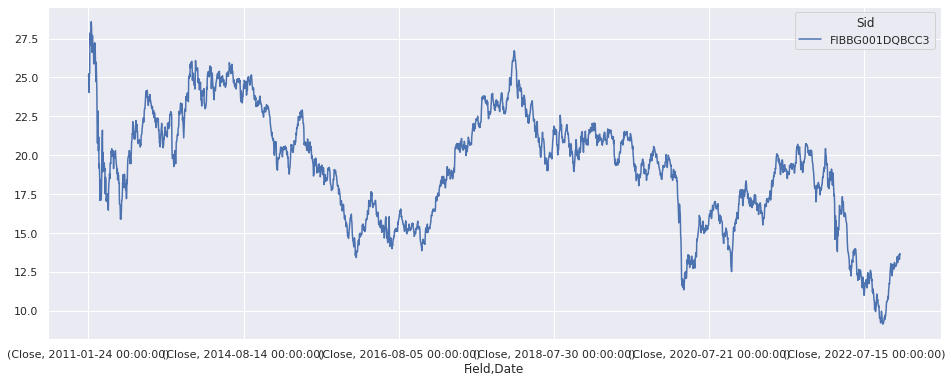

In [54]:
get_prices("global-1d", sids=["FIBBG001DQBCC3"], fields="Close", data_frequency="d").plot()

In [7]:
df_china = get_securities(exchanges=["XSHG"])
df_norway = get_securities(exchanges=["NOTC"])
df_canada = get_securities(exchanges=["XCNQ", "XTSE"])
df_japan = get_securities(exchanges=["XJPX"])
df_mexico = get_securities(exchanges=["XMEX"])
df_london = get_securities(exchanges=["XLON"])
df_hungary = get_securities(exchanges=["XBUD"])
df_newzealand = get_securities(exchanges=["XNZE"])

df_germany = get_securities(exchanges=["XETR"])
df_hongkong = get_securities(exchanges=["XHKG"])
df_kosdaq = get_securities(exchanges=["XKOS"])
df_nasdaq = get_securities(exchanges=["XNAS"])
df_nyse = get_securities(exchanges=["XNYS"])
df_usotc = get_securities(exchanges=["XOTC"])
df_france = get_securities(exchanges=["XPAR"])
df_singapore = get_securities(exchanges=["XSES"])
df_sweden = get_securities(exchanges=["XSTO"])
df_swiss = get_securities(exchanges=["XSWX"])

dfs = [df_china, df_norway, df_canada, df_japan, df_mexico, df_london, df_hungary, df_newzealand, df_germany, df_hongkong, df_kosdaq, df_nasdaq, df_nyse, df_usotc, df_france, df_singapore, df_sweden, df_swiss]
df = pd.concat(dfs)

In [113]:
df[
    (True)
    & (df.Currency == "USD")
    #& (df.Etf == True)
    #& (df.Etf == False)
    & (df.SecType != 'IND')
    & (df.Delisted == False)
    & (df['Name'].str.lower().str.contains("shanghai"))
].Name.values[:6]

array(['Shanghai Lujiazui Finance & Trade Zone Development Co. Ltd.',
       'Shanghai Yaohua Pilkington Glass Group Co Ltd',
       'Shanghai New Power Automotive Technology Company Limited',
       'Shanghai Highly (Group) Co Ltd', 'Shanghai Shibei Hi-Tech Co Ltd',
       'Shanghai Shenqi Pharmaceutical Investment Management Co., Ltd.'],
      dtype=object)

In [60]:
df[
    (True)
    & (df.Currency == "USD")
    #& (df.Etf == True)
    #& (df.Etf == False)
    & (df.SecType != 'IND')
    & (df.Delisted == False)
    #& (df['Name'].str.lower().str.contains("fang"))
    #& (df['Name'].str.lower().str.contains("index"))
    #& (df['Name'].str.lower().str.contains("ishare"))
    & (df['Name'].str.lower().str.contains("sweden"))
]

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,


In [62]:
df.loc[sids_index].sort_values('Currency')

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG006H1RJZ6,CASH,XLON,GB,USD,STK,True,Europe/London,L&G ETFS-E Fund MSCI China A GO UCITS ETF,1,1,False,NaT,NaT,NaT
FIBBG000QW7RC0,XCAD,XLON,GB,USD,STK,True,Europe/London,Xtrackers MSCI Canada ESG Screened UCITS ETF,1,1,False,NaT,NaT,NaT
FIBBG009S0XQY8,XDNU,XLON,GB,USD,STK,True,Europe/London,Xtrackers JPX-Nikkei 400 UCITS ETF 4C Hedged USD,1,1,False,NaT,NaT,NaT
FIBBG0015XN496,CMXC,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Mexico Capped UCITS ETF...,1,1,False,NaT,NaT,NaT
FIBBG001DQBCC3,IPOL,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Poland UCITS ETF USD (Acc),1,1,False,NaT,NaT,NaT
FIBBG000DPT7D8,IDKO,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Korea UCITS ETF USD (Dist),1,1,False,NaT,NaT,NaT
FIBBG0017DVJR6,XCS4,XLON,GB,USD,STK,True,Europe/London,Xtrackers MSCI Thailand UCITS ETF 1C,1,1,False,NaT,NaT,NaT
FIBBG0015M9W30,ENZL,XNAS,US,USD,STK,True,America/New_York,ISHARES MSCI NEW ZEALAND ETF,1,1,False,NaT,NaT,NaT


In [63]:
df.loc[sids_index]['Currency'].unique()

array(['USD'], dtype=object)

In [54]:
sids_currency

['FXAUDUSD',
 'FXUSDCNH',
 'FXNZDUSD',
 'FXUSDNOK',
 'FXUSDCAD',
 'FXUSDJPY',
 'FXUSDTHB',
 'FXUSDCHF',
 'FXUSDTRY',
 'FXUSDPLN',
 'FXUSDSGD',
 'FXUSDCZK',
 'FXUSDDKK',
 'FXUSDHUF',
 'FXEURUSD',
 'FXGBPUSD',
 'FXUSDMXN',
 'FXUSDHKD',
 'FXUSDSEK',
 'FXUSDZAR']

In [47]:
from quantrocket.history import create_ibkr_db
create_ibkr_db("fx-1d", sids=sids_currency, bar_size="1 day", bar_type="MIDPOINT", shard="off")

{'status': 'successfully created quantrocket.v2.history.fx-1d.sqlite'}

In [46]:
from quantrocket.history import drop_db
drop_db("fx-1d", confirm_by_typing_db_code_again="fx-1d")

{'status': 'deleted quantrocket.v2.history.fx-1d.sqlite'}

In [38]:
from quantrocket.ibg import start_gateways
start_gateways(wait=True)

{'ibg1': {'status': 'running'}}

In [48]:
from quantrocket.history import collect_history
collect_history("fx-1d")

{'status': 'the historical data will be collected asynchronously'}

In [ ]:
from quantrocket import get_prices

In [55]:
price_fx = get_prices("fx-1d", sids=sids_currency, fields="Close", data_frequency="d")

In [56]:
price_fx

Sid               FXAUDUSD  FXEURUSD  FXGBPUSD  FXNZDUSD  FXUSDCAD  FXUSDCHF  \
Field Date                                                                     
Close 2005-03-09  0.796900  1.343300  1.927550       NaN  1.203000  1.154400   
      2005-03-10  0.790200  1.342500  1.923750       NaN  1.204850  1.153400   
      2005-03-11  0.793000  1.345800  1.925900       NaN  1.205750  1.150200   
      2005-03-13  0.792800  1.345300  1.923650       NaN  1.205900  1.151100   
      2005-03-14  0.788900  1.336300  1.915650       NaN  1.206800  1.159700   
...                    ...       ...       ...       ...       ...       ...   
      2022-12-26  0.672760  1.063685  1.206695  0.629515  1.358200  0.932055   
      2022-12-27  0.673135  1.063970  1.202530  0.627225  1.352255  0.928940   
      2022-12-28  0.673700  1.061245  1.201665  0.631430  1.360955  0.929685   
      2022-12-29  0.677725  1.066110  1.205535  0.635065  1.354775  0.923305   
      2022-12-30  0.681125  1.069900  1.206930  0.635010  1.353890  0.926435   

Sid               FXUSDCNH  FXUSDCZK  FXUSDHKD  FXUSDHUF  FXUSDJPY   FXUSDMXN  \
Field Date                                                                      
Close 2005-03-09       NaN       NaN  7.799550       NaN  104.1100        NaN   
      2005-03-10       NaN       NaN  7.799650       NaN  104.1300        NaN   
      2005-03-11       NaN       NaN  7.799050       NaN  103.9900        NaN   
      2005-03-13       NaN       NaN  7.799450       NaN  104.4200        NaN   
      2005-03-14       NaN       NaN  7.799850       NaN  104.7500        NaN   
...                    ...       ...       ...       ...       ...        ...   
      2022-12-26   6.97659  22.75750  7.806760  376.2985  132.8755  19.405020   
      2022-12-27   6.97100  22.79500  7.800985  376.6550  133.4910  19.488505   
      2022-12-28   6.99698  22.82145  7.794845  378.6605  134.4640  19.432555   
      2022-12-29   6.97300  22.69945  7.796055  375.0700  133.0275  19.469400   
      2022-12-30   6.92097  22.62095  7.811205  369.0125  131.1275  19.508445   

Sid               FXUSDNOK   FXUSDSEK  
Field Date                             
Close 2005-03-09       NaN        NaN  
      2005-03-10       NaN        NaN  
      2005-03-11       NaN        NaN  
      2005-03-13       NaN        NaN  
      2005-03-14       NaN        NaN  
...                    ...        ...  
      2022-12-26  9.838065  10.496650  
      2022-12-27  9.826975  10.476445  
      2022-12-28  9.897090  10.479600  
      2022-12-29  9.882195  10.466815  
      2022-12-30  9.796380  10.436275  

[4672 rows x 14 columns]